<a href="https://colab.research.google.com/github/Tsyhankova/goit_python/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Часть третья: Анализ датасет c Kaggle.com**


*   Прочитайте csv файл (используйте функцию read_csv)
*   Выведите первый пять строчек (используется функцию head)
*   Выведите размеры датасета (используйте атрибут shape)
*   Ответ: О скольки книгах хранит данные датасет?  550 книг


In [1]:
import pandas as pd

In [9]:
url = 'https://drive.google.com/file/d/14CZNz6OBXJlBKBeY_90tMN4U7O7XPz8z/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
bestsellers_with_cat = pd.read_csv(path)

bestsellers_with_cat.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
bestsellers_with_cat.shape

(550, 7)

In [10]:
bestsellers_with_cat.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# **Первичное исследование данных**

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [12]:
bestsellers_with_cat.isna().sum(axis = 0, skipna = True)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Ответ: Есть ли в каких либо переменных пропуски? Нет

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [14]:
bestsellers_with_cat['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Ответ: Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

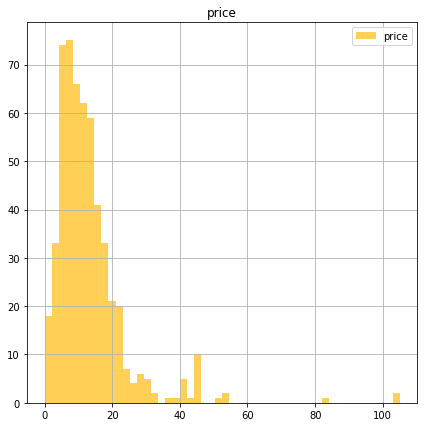

In [25]:
import numpy as np
import matplotlib.pyplot as plt


bestsellers_with_cat.hist(column='price', 
        figsize=(7, 7),
        legend=True,
        bins=50,
        color='#FFCF56')
plt.show()

Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

In [32]:
print("Максимальная цена: ", bestsellers_with_cat["price"].max())
print("Минимальная цена: ", bestsellers_with_cat["price"].min())
print("Средняя цена: ", bestsellers_with_cat["price"].mean())
print("Медианная цена: ", bestsellers_with_cat["price"].median())

Максимальная цена:  105
Минимальная цена:  0
Средняя цена:  13.1
Медианная цена:  11.0


# **Поиск и сортировка данных**

Ответ: Какой рейтинг в датасете наивысший? Ответ: 87841

In [35]:
bestsellers_with_cat["user_rating"].max()

4.9

Ответ: Сколько книг имеют такой рейтинг? Ответ: 52

In [40]:
user_rat = bestsellers_with_cat[bestsellers_with_cat["user_rating"] == bestsellers_with_cat["user_rating"].max()]
user_rat["user_rating"].count()

52

Ответ: У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [42]:
rev_max = bestsellers_with_cat["reviews"].max()
bestsellers_with_cat[bestsellers_with_cat['reviews'] == rev_max]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...	

In [46]:
temp_df = bestsellers_with_cat[bestsellers_with_cat['year'] == 2015]
temp_df[temp_df['price'] == temp_df['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

In [51]:
bestsellers_with_cat[(bestsellers_with_cat['year'] == 2010) & (bestsellers_with_cat['genre'] == 'Fiction')]['name'].count()

20

Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [54]:
temp_df = bestsellers_with_cat[bestsellers_with_cat['year'].isin([2010, 2011])]
temp_df[temp_df['user_rating'] == 4.9]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

In [58]:
bestsellers_with_cat[(bestsellers_with_cat['year'] == 2015) & (bestsellers_with_cat['price'] < 8)].sort_values('price', axis = 0, ascending = True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Ответ: Какая книга последняя в отсортированном списке? Ответ: Old School (Diary of a Wimpy Kid #10)	

# **Агрегирование данных и соединения таблиц**

Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

In [59]:
group_by_genre = bestsellers_with_cat.groupby('genre')
group_by_genre.first()

,name,author,user_rating,reviews,price,year
genre,,,,,,
Fiction,11/22/63: A Novel,Stephen King,4.6,2052,22,2011
Non Fiction,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016


In [65]:
p1 = group_by_genre.agg({'price' : 'min'})
p1 = p1.rename({'price' : 'min_price'},axis=1)
p2 = group_by_genre.agg({'price' : 'max'})
p2 = p2.rename({'price' : 'max_price'}, axis=1)
p = pd.concat([p1, p2], axis=1)
p

,min_price,max_price
genre,,
Fiction,0,82
Non Fiction,0,105



*   Ответ: Максимальная цена для жанра Fiction: Ответ 82
*   Ответ: Минимальная цена для жанра Fiction: Ответ 0
*   Максимальная цена для жанра Non Fiction: Ответ 105
*   Минимальная цена для жанра Non Fiction: Ответ 0


Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [66]:
group_by_author = bestsellers_with_cat.groupby('author')
group_by_author.first()

,name,user_rating,reviews,price,year,genre
author,,,,,,
Abraham Verghese,Cutting for Stone,4.6,4866,11,2010,Fiction
Adam Gasiewski,Milk and Vine: Inspirational Quotes From Class...,4.4,3113,6,2017,Non Fiction
Adam Mansbach,Go the F**k to Sleep,4.8,9568,9,2011,Fiction
Adir Levy,What Should Danny Do? (The Power to Choose Ser...,4.8,8170,13,2019,Fiction
Admiral William H. McRaven,Make Your Bed: Little Things That Can Change Y...,4.7,10199,11,2017,Non Fiction
...,...,...,...,...,...,...
Walter Isaacson,Leonardo da Vinci,4.5,3014,21,2017,Non Fiction
William Davis,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",4.4,7497,6,2012,Non Fiction
William P. Young,The Shack: Where Tragedy Confronts Eternity,4.6,19720,8,2009,Fiction


In [79]:
new_df = group_by_author.agg({'name' : 'count'})
new_df = new_df.rename({'name' : 'number_of_books'}, axis = 1)
new_df

,number_of_books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Ответ: Какой размерности вышла таблица? Ответ: (248, 1)

In [76]:
new_df.shape

(248, 1)

Ответ: У какого автора больше всего книг? Ответ: Jeff Kinney

In [78]:
new_df.sort_values('number_of_books', ascending = False)

,number_of_books
author,
Jeff Kinney,12
Gary Chapman,11
Suzanne Collins,11
Rick Riordan,11
American Psychological Association,10
...,...
David Grann,1
Larry Schweikart,1
David McCullough,1


Ответ: Сколько книг у этого автора? Ответ: 12

Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

In [80]:
new_df_rate = group_by_author.agg({'user_rating' : 'mean'})
new_df_rate

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


Ответ: У какого автора средний рейтинг минимальный? Ответ:  Donna Tartt

Ответ: Какой у этого автора средний рейтинг? Ответ: 3.9

In [82]:
new_df_rate.sort_values('user_rating', ascending = True)

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [83]:
author_rate = pd.concat([new_df, new_df_rate], axis=1)
author_rate

,number_of_books,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

In [89]:
author_rate.sort_values(by = ['number_of_books', 'user_rating'], ascending = [True, True], na_position = 'first')

,number_of_books,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Ответ: Какой автор первый в списке?  Muriel Barbery	